<a href="https://colab.research.google.com/github/Pravinoraon/capstone/blob/main/Notebook%203%3A%20Model%20Testing%20%26%20Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from google.colab import drive


In [31]:
# Mount Google Drive
drive.mount('/content/drive')

# Load trained model
model_path = "/content/drive/MyDrive/bell_pepper_data/bell_pepper_disease_model.h5"  # Update if different
model = tf.keras.models.load_model(model_path)

print("Model loaded successfully!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model loaded successfully!


In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
val_dir = "/content/drive/MyDrive/bell_pepper_data/val"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Preprocessing for validation images
val_datagen = ImageDataGenerator(rescale=1.0/255)

val_data = val_datagen.flow_from_directory(
    val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary'
)

# Evaluate model
loss, accuracy = model.evaluate(val_data)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


Found 496 images belonging to 2 classes.
16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.6098 - loss: 0.6854
Validation Loss: 0.6864
Validation Accuracy: 0.5968


In [34]:
def predict_image(image_path, model):
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    prediction = model.predict(img_array)[0][0]
    category = "Diseased" if prediction > 0.5 else "Healthy"

    plt.imshow(img)
    plt.title(f"Predicted: {category} ({prediction:.2f})")
    plt.axis('off')
    plt.show()


Diseased Images: ['image (929).JPG', 'image (15).JPG', 'image (342).JPG', 'image (426).JPG', 'image (553).JPG']
Healthy Images: ['image (1361).JPG', 'image (1209).JPG', 'image (1007).JPG', 'image (856).JPG', 'image (635).JPG']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


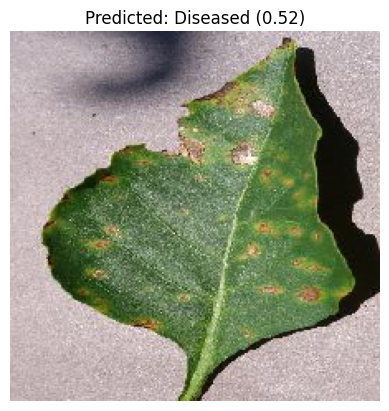

In [36]:
# Check available images in the validation folder
val_diseased_dir = "/content/drive/MyDrive/bell_pepper_data/val/Diseased"
val_healthy_dir = "/content/drive/MyDrive/bell_pepper_data/val/Healthy"

print("Diseased Images:", os.listdir(val_diseased_dir)[:5])
print("Healthy Images:", os.listdir(val_healthy_dir)[:5])

# Select an actual image from the validation dataset
test_image_name = os.listdir(val_diseased_dir)[0]  # Pick first image
test_image_path = os.path.join(val_diseased_dir, test_image_name)

# Predict and visualize
predict_image(test_image_path, model)
